https://www.mathworks.com/help/signal/ug/walsh-hadamard-transform-for-spectral-analysis-and-compression-of-ecg-signals.html

# Kompresija EKG signala

EKG signali su veoma veliki i potrebno je da se čuvaju za analizu i neku buduću upotrebu. Adamardova transformacija nudi dobro rešenje za ovaj problem jer pruža kompresiju koja zahteva manje memorijskog prostora. Ona takođe omogućava i brzu rekonstrukciju signala.

In [143]:
import numpy as np

In [144]:
import scipy
import scipy.signal as sig

In [145]:
import matplotlib.pyplot as plt

In [146]:
from sympy import fwht
from sympy import ifwht

In [193]:
# rr time in seconds
rr = [1.0, 1.0, 0.5, 1.5, 1.0, 0.5, 1.5, 1.0]
# sampling rate
fs = 1024.0

# simulate a signal
pqrst = sig.wavelets.daub(10)
ecg = np.concatenate([sig.resample(pqrst, int(r * fs)) for r in rr])
t = np.arange(len(ecg)) / fs

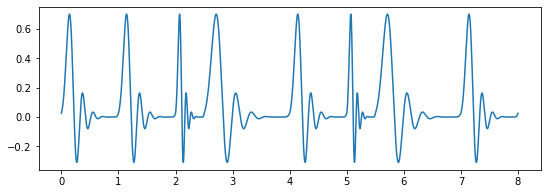

In [197]:
plt.figure(figsize=(9, 3))
plt.plot(t, ecg)
plt.show()

In [198]:
# add noise
ecg_with_noise = ecg + 0.05 * np.random.randn(1, len(ecg))[0]

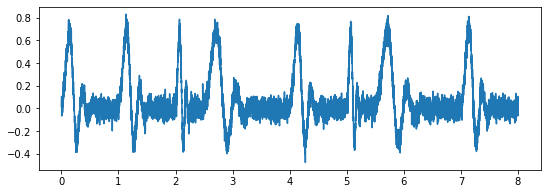

In [199]:
plt.figure(figsize=(9, 3))
plt.plot(t, ecg_with_noise)
plt.show()

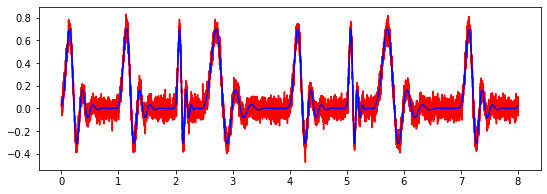

In [200]:
plt.figure(figsize=(9, 3))
plt.plot(t, ecg_with_noise, color = 'r')
plt.plot(t, ecg, color = 'b')
plt.show()

In [201]:
len(ecg_with_noise)

8192

In [207]:
y = fwht(ecg_with_noise)

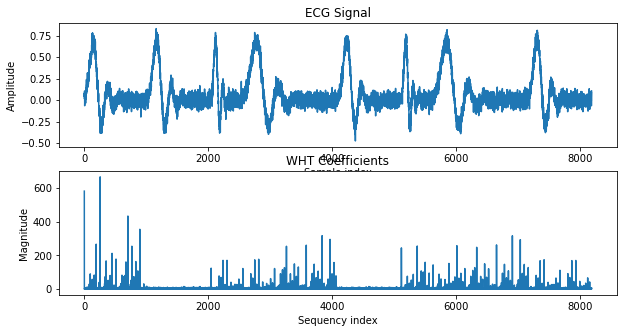

In [204]:
plt.figure(figsize = (10, 5))

plt.subplot(2,1,1)
plt.plot(ecg_with_noise)
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.title('ECG Signal')

plt.subplot(2,1,2)
plt.plot(np.abs(y))
plt.xlabel('Sequency index')
plt.ylabel('Magnitude')
plt.title('WHT Coefficients')

plt.show()

In [210]:
y_1 = np.append(y[:2000], np.zeros(len(y) - 2000))
ecg_reverse = ifwht(y_1);

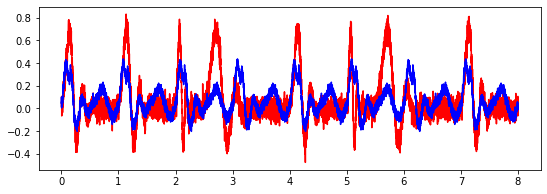

In [211]:
plt.figure(figsize=(9, 3))
plt.plot(t, ecg_with_noise, color = 'r')
plt.plot(t, ecg_reverse, color = 'b')
plt.show()

In [212]:
y_2 = np.append(y[:4000], np.zeros(len(y) - 4000))
ecg_reverse = ifwht(y_2);

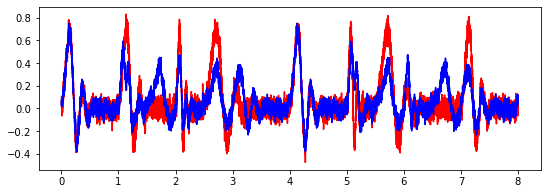

In [213]:
plt.figure(figsize=(9, 3))
plt.plot(t, ecg_with_noise, color = 'r')
plt.plot(t, ecg_reverse, color = 'b')
plt.show()

In [214]:
y_3 = np.append(y[:6000], np.zeros(len(y) - 6000))
ecg_reverse = ifwht(y_3);

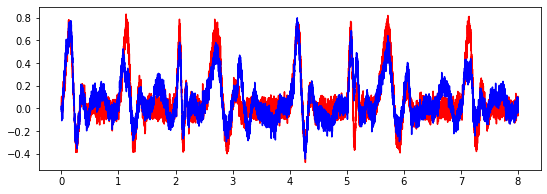

In [215]:
plt.figure(figsize=(9, 3))
plt.plot(t, ecg_with_noise, color = 'r')
plt.plot(t, ecg_reverse, color = 'b')
plt.show()

In [216]:
ecg_reverse = ifwht(y);

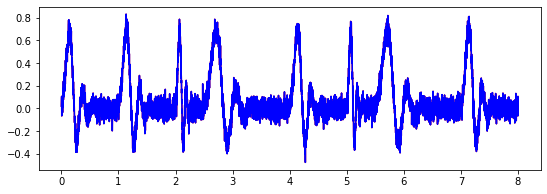

In [217]:
plt.figure(figsize=(9, 3))
plt.plot(t, ecg_with_noise, color = 'r')
plt.plot(t, ecg_reverse, color = 'b')
plt.show()